## Hierarchical clustering of the grain data

### If there are 5 data samples, how many merge operations will occur in a hierarchical clustering?
- 4 merges.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.options.display.max_columns=100
%matplotlib inline

In [2]:
url = 'https://raw.githubusercontent.com/iqbalamo93/Datasets/master/Clustering/seeds.csv'

In [3]:
header = ['area','perimeter','compactness','lengthOfKernel',
 'widthOfKernel','asymmetryCoefficient','lengthOfkernelGroove','Variety']
seed = pd.read_csv(url,names=header)

In [4]:
seed.head()

,area,perimeter,compactness,lengthOfKernel,widthOfKernel,asymmetryCoefficient,lengthOfkernelGroove,Variety
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [5]:
mapper = {1:'Kama',2:'Rosa',3:'Canadian'}
seed['Names'] = seed['Variety'].map(mapper)

In [6]:
seed['Names'].value_counts()

Kama        70
Canadian    70
Rosa        70
Name: Names, dtype: int64

In [7]:
seed.head()

,area,perimeter,compactness,lengthOfKernel,widthOfKernel,asymmetryCoefficient,lengthOfkernelGroove,Variety,Names
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1,Kama
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1,Kama
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1,Kama
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1,Kama
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1,Kama


In [8]:
seed_sampled = seed.sample(100)

In [9]:
samples = seed_sampled.iloc[:,:-2].values
Variety = seed_sampled.iloc[:,-1].values
variety_numbers = seed_sampled.iloc[:,-2].values

The SciPy linkage() function performs hierarchical clustering on an array of samples. Use the linkage() function to obtain a hierarchical clustering of the grain samples, and use dendrogram() to visualize the result.
### Extracting the cluster labels

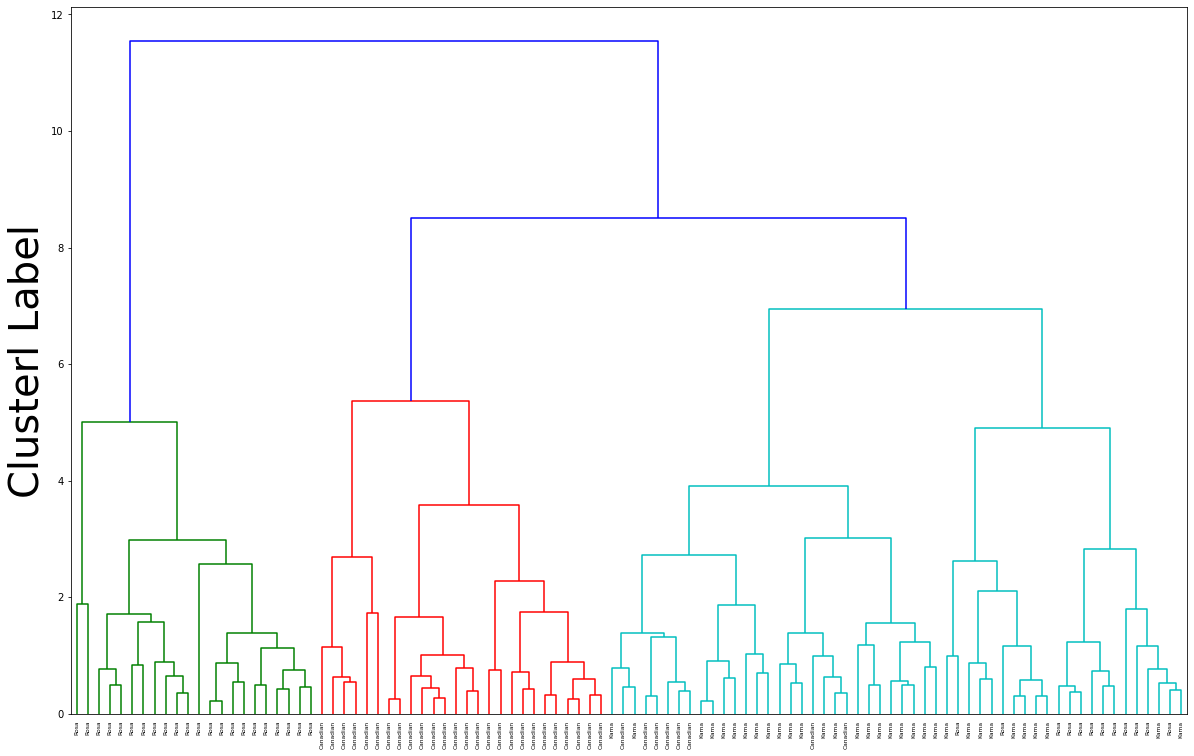

In [10]:
# Performing the necessary imports
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt

# Calculate the linkage: mergings
mergings = linkage(samples,method='complete')

# Plot the dendrogram, using varieties as labels
plt.figure(figsize=(20,13))
dendrogram(mergings,
           labels=Variety,
           leaf_rotation=90,
           leaf_font_size=6,
)
plt.ylabel('Clusterl Label',fontsize=40)
plt.show()

In [11]:
# Use fcluster to extract labels: labels
labels = fcluster(mergings,6,criterion='distance')
# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'varieties': Variety})

# Create crosstab: ct
ct = pd.crosstab(df['labels'],df['varieties'])

# Display ct
print(ct)

varieties  Canadian  Kama  Rosa
labels                         
1                 0     0    22
2                26     0     0
3                 8    22     0
4                 0    10    12


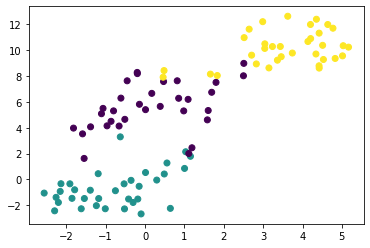

In [19]:
# Import TSNE
from sklearn.manifold import TSNE

# Create a TSNE instance: model
model = TSNE(learning_rate=200)

# Apply fit_transform to samples: tsne_features
tsne_features = model.fit_transform(samples)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1st feature: ys
ys = tsne_features[:,1]

# Scatter plot, coloring by variety_numbers
plt.scatter(xs, ys, c=variety_numbers)
plt.show()


In [13]:
stocks_url='https://raw.githubusercontent.com/iqbalamo93/Datasets/master/Clustering/company-stock-movements-2010-2015-incl.csv'
stocks = pd.read_csv(stocks_url,index_col=[0])

In [14]:
stocks.head()

,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-11,2010-01-12,2010-01-13,2010-01-14,2010-01-15,2010-01-19,2010-01-20,2010-01-21,2010-01-22,2010-01-25,2010-01-26,2010-01-27,2010-01-28,2010-01-29,2010-02-01,2010-02-02,2010-02-03,2010-02-04,2010-02-05,2010-02-08,2010-02-09,2010-02-10,2010-02-11,2010-02-12,2010-02-16,2010-02-17,2010-02-18,2010-02-19,2010-02-22,2010-02-23,2010-02-24,2010-02-25,2010-02-26,2010-03-01,2010-03-02,2010-03-03,2010-03-04,2010-03-05,2010-03-08,2010-03-09,2010-03-10,2010-03-11,2010-03-12,2010-03-15,2010-03-16,...,2013-08-20,2013-08-21,2013-08-22,2013-08-23,2013-08-26,2013-08-27,2013-08-28,2013-08-29,2013-08-30,2013-09-03,2013-09-04,2013-09-05,2013-09-06,2013-09-09,2013-09-10,2013-09-11,2013-09-12,2013-09-13,2013-09-16,2013-09-17,2013-09-18,2013-09-19,2013-09-20,2013-09-23,2013-09-24,2013-09-25,2013-09-26,2013-09-27,2013-09-30,2013-10-01,2013-10-02,2013-10-03,2013-10-04,2013-10-07,2013-10-08,2013-10-09,2013-10-10,2013-10-11,2013-10-14,2013-10-15,2013-10-16,2013-10-17,2013-10-18,2013-10-21,2013-10-22,2013-10-23,2013-10-24,2013-10-25,2013-10-28,2013-10-29
Apple,0.580000,-0.220005,-3.409998,-1.170000,1.680011,-2.689994,-1.469994,2.779997,-0.680003,-4.999995,6.709993,-3.180006,-4.009998,-9.030006,0.560000,-0.010000,1.030010,-5.640009,-9.019993,2.360001,-0.050001,4.060000,-4.680000,2.829998,-1.570009,-0.229992,-0.769990,3.789993,2.269998,1.459994,-1.639998,1.300003,-0.190005,-1.920004,-2.940000,2.430002,4.619999,2.239998,3.240008,-1.079998,0.389996,1.430006,4.009999,-0.930008,4.710001,1.009997,1.590010,-0.770004,-1.540009,0.269993,...,-8.639984,-1.229988,-2.020020,-2.249985,2.220024,-9.410042,4.899979,0.049988,-4.779976,-4.519997,-0.869980,-4.980034,-0.219979,1.169960,-11.559998,0.699989,4.190003,-4.439995,-10.879982,7.360008,1.500008,1.599983,-10.589988,-5.459991,-5.779999,-7.669976,0.219979,-1.029983,-0.500038,9.510018,3.929970,-7.100029,-0.829979,1.190040,-9.000045,1.950005,-1.679985,5.820000,6.209969,1.169960,0.320008,4.519997,2.899987,9.590019,-6.540016,5.959976,6.910011,-5.359962,0.840019,-19.589981
AIG,-0.640002,-0.650000,-0.210001,-0.420000,0.710001,-0.200001,-1.130001,0.069999,-0.119999,-0.500000,0.200001,-0.100000,-0.460001,-1.190001,-0.650000,-1.300001,0.430000,-1.690000,-0.300001,-0.420000,-0.020001,-0.099998,-0.940001,-0.090000,-0.250000,0.760000,3.710001,-0.200001,1.000000,0.000000,-0.630001,0.299999,-0.010000,1.540001,-1.459999,0.830000,0.069999,-0.900000,-2.179998,-0.899999,-0.230002,1.619999,1.139999,-0.330000,4.380001,2.340000,-2.500000,-1.869998,-0.189998,-1.180000,...,0.639999,-0.079998,0.160000,0.049999,0.000000,-0.529999,0.290001,0.270001,-0.180000,0.570000,0.680000,0.229999,-0.720002,0.829998,-0.130001,0.340000,-0.620003,0.320000,-0.470001,0.790001,0.279999,-0.930000,-0.020000,-0.439998,0.100003,0.190003,-0.239998,-0.029998,0.020000,0.579998,0.350002,-0.210003,0.660000,-0.310001,-1.099998,0.050000,1.290001,0.330002,0.599999,-0.160000,0.919998,0.709999,0.119999,-0.480000,0.010002,-0.279998,-0.190003,-0.040001,-0.400002,0.660000
Amazon,-2.350006,1.260009,-2.350006,-2.009995,2.960006,-2.309997,-1.640007,1.209999,-1.790001,-2.039994,1.300003,-1.349998,-0.639999,-4.169998,-1.790000,-1.079995,1.720001,1.599999,-4.360000,-4.309997,-0.669998,1.979995,-2.699997,1.510002,-2.549995,-0.169998,-0.639999,2.879997,0.670006,-2.529999,-0.760002,2.240006,-0.390007,0.639999,-0.770004,1.760002,0.029999,0.520005,5.840004,0.519997,0.489997,2.549996,-0.220001,1.809998,-0.769989,1.399994,3.130005,-2.379990,-0.569992,0.549988,...,1.209991,-0.519989,4.930023,-1.199981,-4.220002,-2.940002,1.220002,2.529999,-3.609985,4.069977,5.310028,0.470001,0.529998,2.489990,-0.190003,0.730011,-0.530030,-2.220002,-3.760009,6.540008,7.970001,-1.709991,3.799987,-2.520020,1.700012,-1.880005,4.220001,-0.910003,-0.769989,6.730011,2.470001,-5.630005,3.910004,-5.209991,-8.269989,-5.190002,0.540008,6.120026,1.480011,-3.470001,2.109985,3.699982,9.570008,-3.450013,4.820008,-4.079986,2.579986,4.790009,-1.760009,3.740021
Americ

In [15]:
movements = stocks.values
companies = stocks.index.to_list()

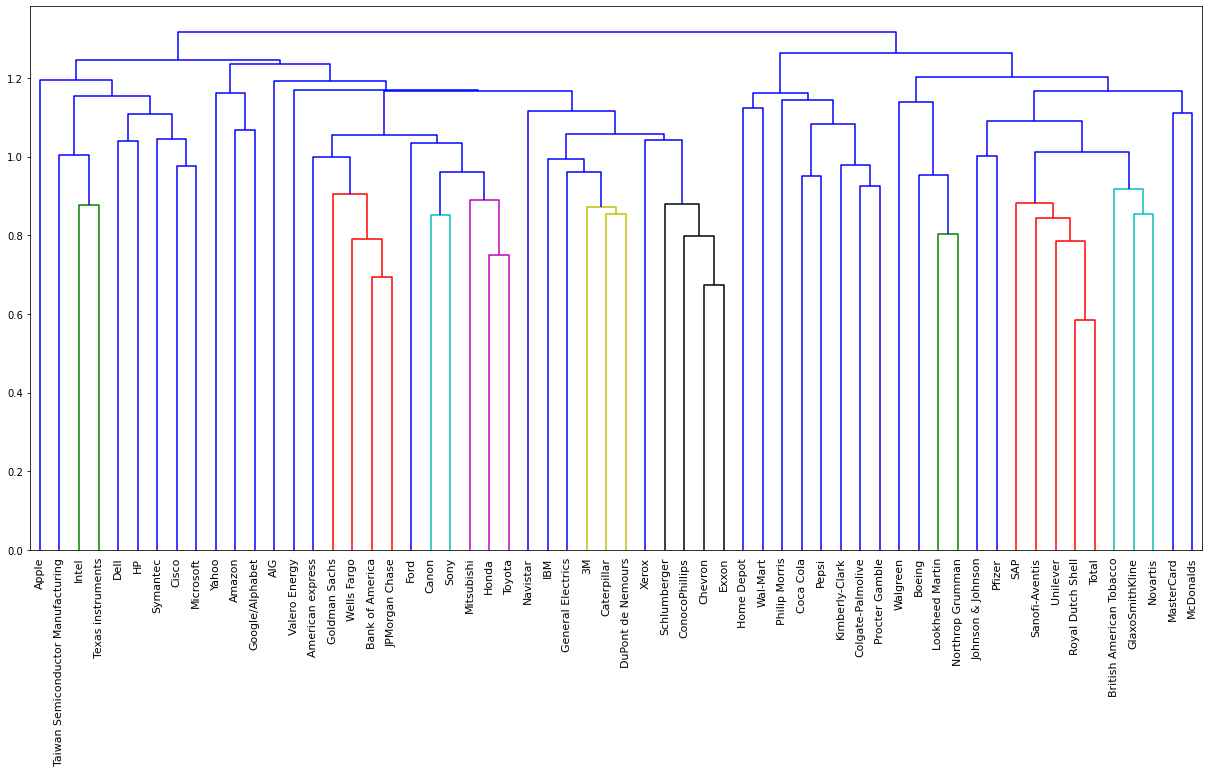

In [16]:
# Import normalize
from sklearn.preprocessing import normalize

# Normalize the movements: normalized_movements
normalized_movements = normalize(movements)

# Calculate the linkage: mergings
mergings = linkage(normalized_movements,method='complete')

# Plot the dendrogram
plt.figure(figsize=(21,10))
dendrogram(mergings,labels=companies,leaf_rotation=90,leaf_font_size=11)
plt.show()


In [17]:
# Use fcluster to extract labels: labels
labels = fcluster(mergings,1.21,criterion='distance')
# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels':labels , 'companies': companies})
df=df.sort_values(by='labels')

# Display ct
print(df)

    labels                           companies
0        1                               Apple
51       1                   Texas instruments
50       1  Taiwan Semiconductor Manufacturing
47       1                            Symantec
33       1                           Microsoft
24       1                               Intel
22       1                                  HP
14       1                                Dell
11       1                               Cisco
17       2                     Google/Alphabet
59       2                               Yahoo
2        2                              Amazon
35       3                            Navistar
44       3                        Schlumberger
10       3                      ConocoPhillips
34       3                          Mitsubishi
45       3                                Sony
32       3                                  3M
3        3                    American express
48       3                              Toyota
58       3   

In [18]:
df['labels'].value_counts()#.nlargest(5)#.sort_index()

3    24
5    16
1     9
4     8
2     3
Name: labels, dtype: int64

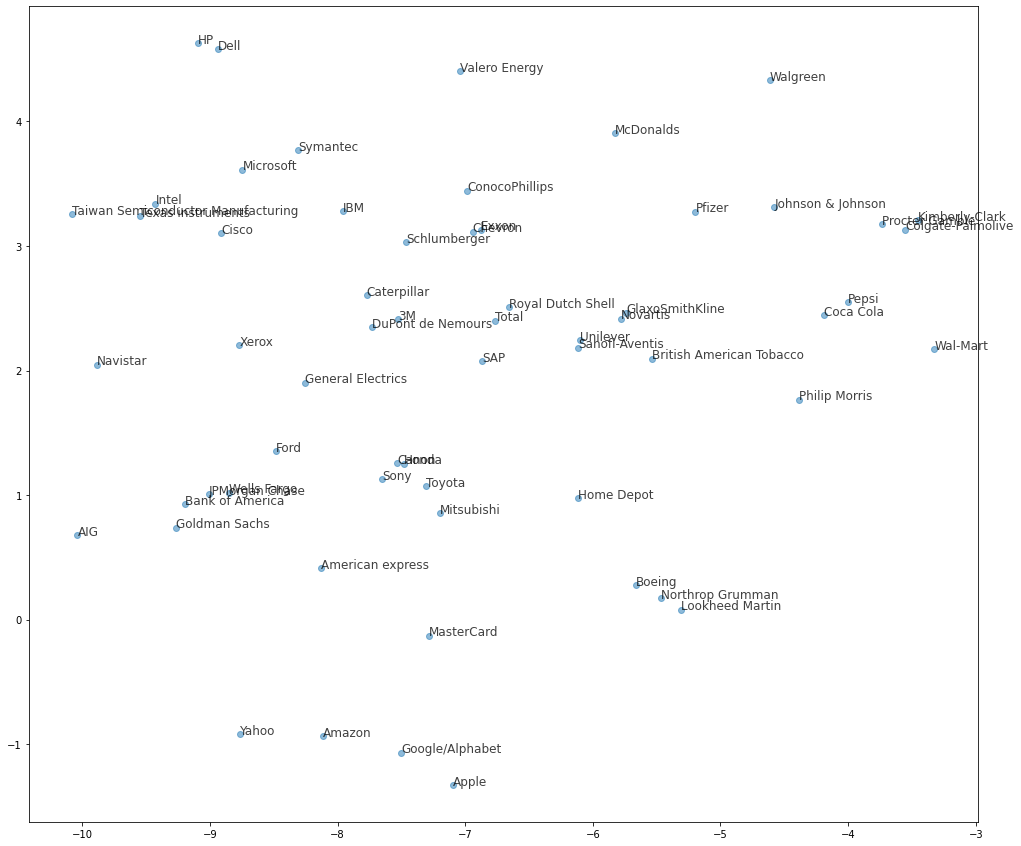

In [30]:
# Import TSNE
from sklearn.manifold import TSNE

# Create a TSNE instance: model
model = TSNE(learning_rate=50)

# Apply fit_transform to normalized_movements: tsne_features
tsne_features = model.fit_transform(normalized_movements)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1th feature: ys
ys = tsne_features[:,1]

# Scatter plot
plt.figure(figsize=(17,15))
plt.scatter(xs, ys, alpha=0.5)

# Annotate the points


for x, y, company in zip(xs, ys, companies):
    plt.annotate(company, (x, y), fontsize=5, alpha=0.75, size=12)
plt.show()


Fantastic! It's visualizations such as this that make t-SNE such a powerful tool for extracting quick insights from high dimensional data.